In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from datetime import datetime
import seaborn as sns
from scipy import stats
from utils.util_functions import *

In [29]:
df = pd.read_csv("../../new_data/ANSV_Colombia_Data/vel_data_waze.csv")
df = df[df["nameroute"].isin(['Duitama_Sogamoso', 'Duitama_Tunja','Sogamoso_Duitama', 'Tunja_Duitama'])]
df
# df.columns

,OBJECTID,nameroute,idroute,toname,historictime,fromname,length0,jamlevel,time,subroutes_childindex,...,fecha_hora,fecha,mes,dia,hora,minuto,dia_semana,lenght_mt,vel_historic,Shape_Length
2,3,Duitama_Sogamoso,28847,Calle 11,880,Duitama-Tibasosa / RN55,15271.0,0.0,880.0,2.0,...,2021-11-30 20:01:26,2021-11-30,Nov,30,20:01:26,1,Tue,15.271,62.472273,0.138197
3,4,Duitama_Sogamoso,28847,Duitama-Paipa / RN55-02 >(S),80,Duitama-Tibasosa / RN55,888.0,2.0,80.0,1.0,...,2021-11-30 20:01:26,2021-11-30,Nov,30,20:01:26,1,Tue,0.888,39.960000,0.008019
4,5,Duitama_Sogamoso,28847,Duitama-Tibasosa / RN55-02 >(N),120,d,1665.0,0.0,121.0,0.0,...,2021-11-30 20:01:26,2021-11-30,Nov,30,20:01:26,1,Tue,1.665,49.950000,0.015403
5,6,Duitama_Tunja,28577,Combita,83,Combita,1901.0,2.0,83.0,1.0,...,2021-11-30 22:57:00,2021-11-30,Nov,30,22:57:00,57,Tue,1.901,82.453012,0.017185
6,7,Duitama_Tunja,28577,Combita,1535,Duitama-Paipa / RN55-02 >(S),30578.0,0.0,1517.0,0.0,...,2021-11-30 22:57:00,2021-11-30,Nov,30,22:57:00,57,Tue,30.578,71.713876,0.277389
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
61534,61535,Sogamoso_Duitama,28848,Duitama-Paipa / RN55-02 >(S),891,Calle 11,14244.0,0.0,891.0,0.0,...,2022-May-06 15:06:52,2022-May-06,May,6,15:06:52,6,Fri,14.244,57.551515,0.128888
61535,61536,Sogamoso_Duitama,28848,Duitama-Paipa / RN55-02 >(S),121,d,1000.0,4.0,204.0,1.0,...,2022-May-06 15:06:52,2022-May-06,May,6,15:06:52,6,Fri,1.000,29.752066,0.009032
61536,61537,Sogamoso_Duitama,28848,d,21,Tibasosa-Duitama / RN62-10 >Occidente,258.0,0.0,21.0,2.0,...,2022-May-06 15:06:52,2022-May-06,May,6,15:06:52,6,Fri,0.258,44.228571,0.002332
61537,61538,Sogamoso_Duitama,28848,Carrera 35,129,Av. de las Américas,1267.0,0.0,132.0,4.0,...,2022-May-06 15:06:52,2022-May-06,May,6,15:06:52,6,Fri,1.267,35.358140,0.011436


In [13]:
df.columns

Index(['OBJECTID', 'nameroute', 'idroute', 'toname', 'historictime',
       'fromname', 'length0', 'jamlevel', 'time', 'subroutes_childindex',
       'date', 'historictime_min', 'timeroutes_min', 'vel_routes',
       'fecha_hora', 'fecha', 'mes', 'dia', 'hora', 'minuto', 'dia_semana',
       'lenght_mt', 'vel_historic', 'Shape_Length'],
      dtype='object')

In [14]:
df["idroute"].unique()

array([28847, 28577, 28848, 28576, 26996, 26997])

In [15]:
df[["date","fecha_hora"]]

,date,fecha_hora
2,2021/12/01 01:01:27,2021-11-30 20:01:26
3,2021/12/01 01:01:27,2021-11-30 20:01:26
4,2021/12/01 01:01:27,2021-11-30 20:01:26
5,2021/12/01 03:57:01,2021-11-30 22:57:00
6,2021/12/01 03:57:01,2021-11-30 22:57:00
...,...,...
61534,2022/05/06 20:06:53,2022-May-06 15:06:52
61535,2022/05/06 20:06:53,2022-May-06 15:06:52
61536,2022/05/06 20:06:53,2022-May-06 15:06:52
61537,2022/05/06 20:06:53,2022-May-06 15:06:52


[]

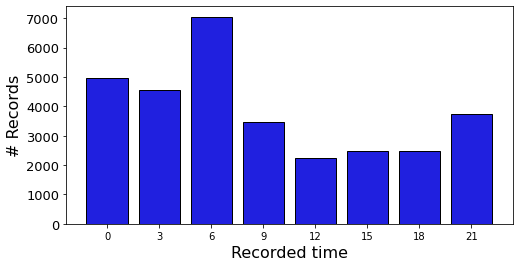

In [30]:
df.loc[:,'date_1']=df['date'].apply(lambda x: datetime.strptime(x,'%Y/%m/%d %H:%M:%S')) #convert str to timestamp

df["date_1"] = df["date_1"] - pd.Timedelta(hours=15) 
# df.loc[:,'date_1']=df['date'].apply(lambda x: datetime.strptime(x,'%Y/%m/%d %H:%M:%S')) #convert str to timestamp
df['date_1h'] = df['date_1'].apply(lambda dt: datetime(dt.year, dt.month, dt.day, dt.hour))
df['date_3h'] = df['date_1'].apply(lambda dt: datetime(dt.year, dt.month, dt.day, 3*(dt.hour // 3)))
df["hourTimeStamp"] = df["date_3h"].dt.hour

df["day_name"] = df['date_1h'].dt.day_name()
df["day_type"] = df["day_name"].apply(lambda x: "weekday" if x not in ["Saturday", "Sunday"] else "weekend")


fig, ax = plt.subplots(1, 1, figsize=(8,4))
sns.countplot( x = df["hourTimeStamp"], color = "b", edgecolor = "k", ax=ax)
# plt.xticks(np.arange(8),["0-3","3-6","6-9","9-12","12-15","15-18","18-21","21-24"], fontsize=13)
plt.yticks(fontsize=13)
plt.xlabel("Recorded time", fontsize=16)
plt.ylabel("# Records", fontsize=16)
# plt.savefig("outputs/2022_11_informe/numRecords_segmentDay.png", dpi=200, bbox_inches="tight")
plt.plot()

In [32]:
df["date_1h"].min()

Timestamp('2021-11-18 02:00:00')

In [33]:
df["date_1h"].max()

Timestamp('2022-05-06 05:00:00')

In [22]:
# df = df[df["day_type"] == "weekday"]
# df.head()

,OBJECTID,nameroute,idroute,toname,historictime,fromname,length0,jamlevel,time,subroutes_childindex,...,dia_semana,lenght_mt,vel_historic,Shape_Length,date_1,date_1h,date_3h,hourTimeStamp,day_name,day_type
2,3,Duitama_Sogamoso,28847,Calle 11,880,Duitama-Tibasosa / RN55,15271.0,0.0,880.0,2.0,...,Tue,15.271,62.472273,0.138197,2021-11-30 10:01:27,2021-11-30 10:00:00,2021-11-30 09:00:00,9,Tuesday,weekday
3,4,Duitama_Sogamoso,28847,Duitama-Paipa / RN55-02 >(S),80,Duitama-Tibasosa / RN55,888.0,2.0,80.0,1.0,...,Tue,0.888,39.960000,0.008019,2021-11-30 10:01:27,2021-11-30 10:00:00,2021-11-30 09:00:00,9,Tuesday,weekday
4,5,Duitama_Sogamoso,28847,Duitama-Tibasosa / RN55-02 >(N),120,d,1665.0,0.0,121.0,0.0,...,Tue,1.665,49.950000,0.015403,2021-11-30 10:01:27,2021-11-30 10:00:00,2021-11-30 09:00:00,9,Tuesday,weekday
5,6,Duitama_Tunja,28577,Combita,83,Combita,1901.0,2.0,83.0,1.0,...,Tue,1.901,82.453012,0.017185,2021-11-30 12:57:01,2021-11-30 12:00:00,2021-11-30 12:00:00,12,Tuesday,weekday
6,7,Duitama_Tunja,28577,Combita,1535,Duitama-Paipa / RN55-02 >(S),30578.0,0.0,1517.0,0.0,...,Tue,30.578,71.713876,0.277389,2021-11-30 12:57:01,2021-11-30 12:00:00,2021-11-30 12:00:00,12,Tuesday,weekday


In [7]:
df["nameroute"].unique()

array(['Duitama_Sogamoso', 'Duitama_Tunja', 'Sogamoso_Duitama',
       'Tunja_Duitama'], dtype=object)

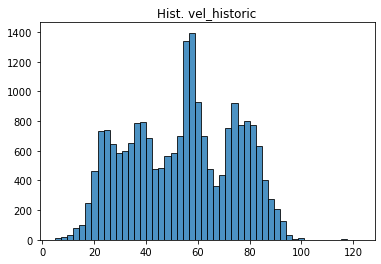

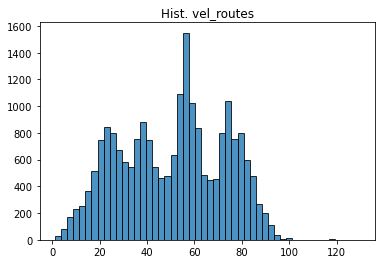

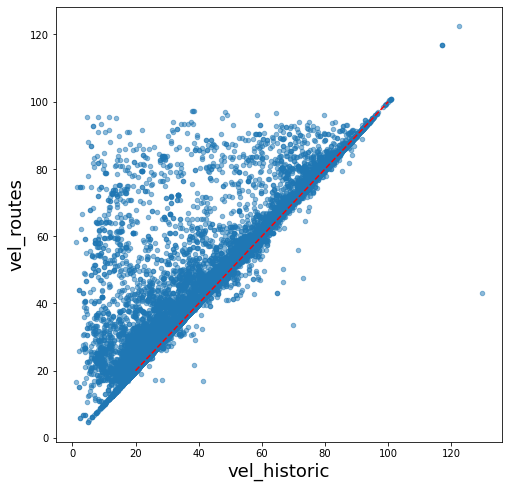

In [23]:
plt.hist(df['vel_historic'],bins=50,alpha=0.8, edgecolor = "black")  
plt.title("Hist. vel_historic")
# plt.xscale('log')
# plt.yscale('log')
plt.show()


plt.hist(df['vel_routes'],bins=50,alpha=0.8, edgecolor = "black")  
plt.title("Hist. vel_routes")
# plt.xscale('log')
# plt.yscale('log')
plt.show()

fig, ax = plt.subplots(figsize=(8,8))

# xx = df["vel_historic"]
# yy = df["vel_routes"]

xx = df["vel_routes"]
yy = df["vel_historic"]


ax.scatter(xx,yy, alpha = 0.5, s = 20)
    
xx = np.linspace(20,100)
ax.plot(xx,xx, c = 'r', ls = "--")     
plt.xlabel("vel_historic", fontsize = 18)
plt.ylabel("vel_routes", fontsize = 18)
plt.show()  

In [41]:
df_agg = df.groupby(["hourTimeStamp"]).agg(
    speed = ("vel_routes","mean"),
    speed_median = ('vel_routes', "median"),
    speed_std = ("vel_routes","std"),
    speed_max = ('vel_routes', "max"),
    speed_min = ('vel_routes', "min")).reset_index()

df_agg

# del df_agg[df_agg["hourTimeStamp"] == 0]
f_agg["hourTimeStamp"] = df_agg["hourTimeStamp"].replace([3,6,9,12,15,18,21,24],["3-6","6-9","9-12","12-15","15-18","18-21","21-24","0-3"])
# del df_agg[:1]

df_agg

,hourTimeStamp,speed,speed_median,speed_std,speed_max,speed_min
0,0,46.963793,49.548913,20.024578,129.600000,2.838857
1,3-6,45.305562,44.683460,20.353267,129.600000,1.097934
2,6-9,42.775378,42.800000,19.816039,91.636364,2.472289
3,9-12,52.673350,55.481565,21.057316,94.784516,0.498774
4,12-15,68.221398,73.235503,17.839003,99.450000,5.600000
5,15-18,72.383839,74.869307,14.796807,117.000000,5.400000
6,18-21,70.070768,74.661151,17.663350,122.400000,1.680000
7,21-24,48.615258,51.690023,20.461781,95.952475,2.448000


In [25]:
df_agg["speed"].mean()

55.876168179066255

# Comparando con speeds calculadas

In [26]:
ids_tunja_sogamoso = list(pd.read_csv("../../../shared_speeds_wbg/tunja_sogamoso_id_roads.csv")["id"].unique())
ids_tunja_sogamoso = [i for i in ids_tunja_sogamoso if i != 0] #list of ids of roads in tunja-sogamoso
# ids_tunja_sogamoso

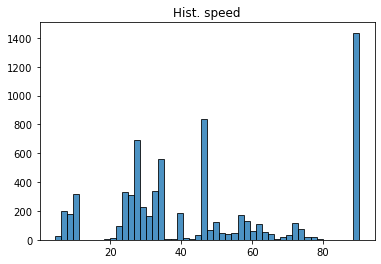

,hourTimeStamp,speed,speed_median,speed_std,speed_max,speed_min
0,3-6,47.331204,40.187164,28.495871,90.180106,7.302243
1,6-9,45.981004,38.522281,27.527119,90.180106,8.451644
2,9-12,46.720617,40.399241,27.018565,90.180106,9.694848
3,12-15,46.131959,40.414676,26.790858,90.180106,9.698116
4,15-18,46.080525,40.414676,26.917799,90.180106,8.694162
5,18-21,45.950808,40.414676,27.435149,90.180106,8.681742
6,21-24,48.218141,40.414676,28.698908,90.180106,7.270397


In [34]:
df_dis = get_all_dis()
df_dis.loc[:,'date_1']=df_dis['timestamp'].apply(lambda x: datetime.strptime(x,'%Y-%m-%d %H:%M:%S')) #convert str to timestamp
df_dis['date_3h'] = df_dis['date_1'].apply(lambda dt: datetime(dt.year, dt.month, dt.day, 3*(dt.hour // 3)))
df_dis["hourTimeStamp"] = df_dis["date_3h"].dt.hour

df_dis = df_dis[df_dis["id"].isin(ids_tunja_sogamoso)]

plt.hist(df_dis['speed'],bins=50,alpha=0.8, edgecolor = "black")  
plt.title("Hist. speed")
# plt.xscale('log')
# plt.yscale('log')
plt.show()


df_dis = df_dis.groupby(["id","hourTimeStamp"]).agg(
    speed = ("speed",stats.hmean),
    speed_std = ("speed","std")).reset_index()

# df_dis = df_dis[(df_dis["speed"].notna()) & (df_dis["speed"] < 150) & (df_dis["speed"] >15)] #Pues hay velocidades muy altas, ej: id 135 el 07-05 de 2022
    
# MERGE INDICES DISAGGREGATED-V2V3
df_v2v3 = pd.read_csv("../../idv2_idv3.csv") # id_2 Road_2 son las columnas de los segmentos que estamos analizando
df_dis = df_dis.merge(df_v2v3, left_on = "id", right_on = "id")

df_dis = df_dis.groupby(["hourTimeStamp"]).agg(
    speed = ("speed","mean"),
    speed_median = ('speed', "median"),
    speed_std = ("speed","std"),
    speed_max = ('speed', "max"),
    speed_min = ('speed', "min")).reset_index()

df_dis["hourTimeStamp"] = df_dis["hourTimeStamp"].replace([3,6,9,12,15,18,21,24],["3-6","6-9","9-12","12-15","15-18","18-21","21-24","0-3"])
df_dis

In [26]:
df_dis["speed"].mean()

46.87035711410987

In [24]:
df_vel = pd.read_csv("outputs/2022_11_informe/df_merge_id_fromVel.csv")

df_vel = df_vel[df_vel["ID_1"].isin(ids_tunja_sogamoso)]

df_vel = df_vel.groupby(["hourTimeStamp"]).agg(
    speed = ("speed","mean"),
    speed_std = ("speed","std")).reset_index()

df_vel



,hourTimeStamp,speed,speed_std
0,6,65.835357,16.413921
1,9,64.881059,16.353566
2,12,66.413325,17.676282
3,15,65.160800,16.905046
4,18,64.988125,16.545127


In [27]:
df_vel["speed"].mean()

65.45573297279438